---

## Gradient Descent Algorithm and Applications
#### Language: Python 3.8.8
#### Author: Tianjian Sun

---

### Table of Contents

* [Introduction](#Introduction)
* [Algorithm](#Algorithm)
  * [General Algorithm](#Algorithm)
  * [Algorithm for Linear Regression](#Linear_Regression)
* [Illustration](#Illustration)
* [Advantages and Disadvantages](#Advantages_and_Disadvantages)
    * [Advantages](#Advantages)
    * [Disadvantages](#Disadvantages)
* [Code of gradient descent](#Code)
* [Applications on data sets](#Applications)
    * [Toys data in class](#toy)
    * [Ethereum (ETH) price data](#ETH)

---
### Introduction <a class="anchor" id="Introduction"></a>
In this section we focus on a straight-forward optimization method, gradient descent. The main idea of gradient Descent is to take repeated steps in the opposite direction of the gradient of the function at the current point, because this is the direction of steepest descent. Conversely, stepping in the direction of the gradient will lead to a local maximum of that function.

(From Wikipedia) [Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is a classic and old optimization method, back to 1800's, which is generally attributed to [Cauchy](https://en.wikipedia.org/wiki/Augustin-Louis_Cauchy), who first suggested it in [1847](https://www.math.uni-bielefeld.de/documenta/vol-ismp/40_lemarechal-claude.pdf). [Hadamard](https://en.wikipedia.org/wiki/Jacques_Hadamard) independently proposed a similar method in 1907. The method became increasingly well-studied and used in the following decades.

Gradient descent is widely used in most optimization tasks, especially finding solutions of loss functions. It plays a crucial role in the field of machine learning, as most machine learning models concrete a loss function and they all have the same goal: find the parameters that minimize the loss function, and gradient descent can be applied for most all kinds of minimization tasks. Hence gradient descent is one of the fundamental methods in machine-learning algorithms due to its simplicity and well-known properties.

---

### Algorithm <a class="anchor" id="Algorithm"></a>
The ideas of gradient descent is really simple: find the direction (negative first derivative) of the goal function, then move a step towards the direction, iteratively doing these until reach an ideal solution. 

(From [Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)) Gradient descent is based on the observation that if the multi-variable function $F(\mathbf {x})$ is defined and differentiable in a neighborhood of a point $\mathbf {a}$, then $F(\mathbf {x})$ decreases fastest if one goes from $\mathbf {a}$  in the direction of the negative gradient of $F(\mathbf {\mathbf {a}})$, $-\nabla F(\mathbf {a})$. It follows that, if
$$
\mathbf{a}_{n+1} = \mathbf{a}_n-\gamma\nabla F(\mathbf{a}_n)
$$

for a small enough step size or learning rate $\gamma \in \R_{+}$, then  $F(\mathbf{a_n})\geq F(\mathbf{a_{n+1}})$. In other words, the term $\gamma\nabla F(\mathbf{a})$ is subtracted from $\mathbf{a}$ because we want to move against the gradient, toward the local minimum. With this observation in mind, one starts with a guess $\mathbf{x}_0$ for a local minimum of $F$, and considers the sequence $\mathbf{x}_0, \mathbf{x}_1, \mathbf{x}_2, \ldots$ such that

$$
\mathbf{x}_{n+1}=\mathbf{x}_n-\gamma_n \nabla F(\mathbf{x}_n),\ n \ge 0.
$$

We have a Monotonic function sequence

$F(\mathbf{x}_0)\ge F(\mathbf{x}_1)\ge F(\mathbf{x}_2)\ge \cdots$

So hopefully, the sequence $(\mathbf {x} _{n})$ converges to the desired local minimum. Note that the value of the step size $\gamma$ is allowed to change at every iteration. With certain assumptions on the function $F$ (for example, $F$ convex and $\nabla F$ Lipschitz) and particular choices of $\gamma$, convergence to a local minimum can be guaranteed. When the function $F$ is convex, all local minima are also global minima, so in this case gradient descent can converge to the global solution.

#### Algorithm for Linear Regression <a class="anchor" id="Linear_Regression"></a>

$F$ can be any close-form function that is differentiable. For linear regression model, the residual sum of squares

$$
RSS(\boldsymbol{\beta}) = \sum_{i=1}^n {\epsilon_i^2} =\sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^{p} {\beta_j x_{ij}})^2
$$

is minimized to find the coefficients $\boldsymbol{\beta}$. Thus we can apply gradient descent method to find the minimun of $RSS$, rather than find the solution directly.

To cancel out the scaler term during the derivative calculation, we add an $\frac{1}{2}$ term in $RSS$. 

The algorithm for linear regression is as follows

1. Define the loss(cost) function
$$
L(\boldsymbol{\beta}) = \frac{1}{2} RSS(\boldsymbol{\beta}) = \frac{1}{2} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^{p} {\beta_j x_{ij}})^2
$$

In matrix form
$$
L(\boldsymbol{\beta}) = \frac{1}{2} (\textbf{y}-\textbf{X}\boldsymbol{\beta})^T (\textbf{y}-\textbf{X}\boldsymbol{\beta})
$$

1. Take derivatives of $\beta_0, \cdots, \beta_p$
$$
\frac{\partial L}{\partial \beta_0} = \sum_{i=1}^{n}(\beta_0 + \sum_{j=1}^{p} {\beta_j x_{ij}} - y_{i})
$$
$$
\frac{\partial L}{\partial \beta_j} = \sum_{i=1}^{n}(\beta_0 + \sum_{j=1}^{p} {\beta_j x_{ij}} - y_{i})x_{ij},  j=1 \dots p
$$

In matrix form we have
$$
\frac{\partial L} {\partial \boldsymbol{\beta}} = - \textbf{X}^T (\textbf{y}-\textbf{X}\boldsymbol{\beta})
$$

3. Set a learning rate $\gamma$ and initialize random weights $\beta_0, \cdots, \beta_p$, then iteratively do the following
$$
\beta_0 = \beta_0 - \gamma \frac{\partial L}{\partial \beta_0}
$$
$$
\beta_j = \beta_j - \gamma \frac{\partial L}{\partial \beta_j}, j=1 \dots p
$$

In matrix form we have
$$
\boldsymbol{\beta} = \boldsymbol{\beta} - \gamma \frac{\partial L}{\partial \boldsymbol{\beta}}
$$

until a maximun number of training steps $N$ is reached or a threshold $\eta$ of change of loss between two trainning steps is met.

4. Return $\beta_0, \cdots, \beta_p$.

Notice that we need to initialize a learning rate $\gamma$, random weights $\beta_0, \cdots, \beta_p$, and set a maximun number of training steps $N$, a threshold $\eta$ before training. These initial parameters are crucial in gradient descent, as they largely impact the convergence speed and process. A good initialization can make convergence really fast. 

Usually 
* $\gamma$ should decrease along the training process, or it's easy to go cross the local minimum
* $\beta_0, \cdots, \beta_p$ should be close to $0$ but not $0$. 
* $N$ could be large, to make sure the training reaches convergence.
* $\eta$ should be small enough

---

### Illustration <a class="anchor" id="Illustration"></a>

Take a look at the two-dimension space, we can have a intuitive idea about how gradient descent works.

Let the parameter $w$ be in one-dimensional space, and given a close-form cost function $L$. The $L-w$ plot, by *Machine Learning Glossary* ([link](http://sebastianruder.com/optimizing-gradient-descent/)), is below. It shows that how a initial random weight $w$ is moving towards the local minimum of cost function $L$ step by step using gradient descent, and at the final step, a certain threshold is met and the training process ends, returning a good weight $w$.

![gradient_descent](images/gradient_descent_demystified.png)


---

### Advantages and Disadvantages <a class="anchor" id="Advantages_and_Disadvantages"></a>

#### Advantages: <a class="anchor" id="Advantages"></a>

* Easy and Simple. Gradient descent is based on simple theoretical analysis of weights and convergence rates, which are easy to understand.
* Guarantee Convergence. Gradient descent is proved to converge to local minimum, which is exactly what most machine learning algorithms need.




#### Disadvantages: <a class="anchor" id="Disadvantages"></a>

* Computationally Expensive. Gradient descent takes all training sample to calculate the derivative of loss function, which performs redundant computation for the same training example for large datasets.
* Cost Lots of Memory. Gradient descent can be very slow and intractable as large datasets may not fit in the memory.

---

### Code of gradient descent <a class="anchor" id="Code"></a>

#### All packages used in this notebook
* [numpy](https://numpy.org/)
* [pandas](https://pandas.pydata.org/)
* [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/)
* [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html)
* [matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
from sklearn.preprocessing import StandardScaler

#### function of gradient descent of linear regression

In [2]:
class gradient_descent_LR():
    def __init__(self) -> None:
        self.X = None
        self.variables = None
        self.y = None
        self.predictor = None
        self.n = None
        self.p = None
        self.bias = None
        self.gamma = None
        self.max_iter = None
        self.eta = None

        self.weights = None
        self.weights_history = []
        self.loss_history = [np.inf]
        
    def loss(self):
        MSE_loss = 0.5 * (self.y - self.X @ self.weights).T@(self.y - self.X @ self.weights)
        return MSE_loss

    def gradient_L(self):
        d_w = - self.X.T @ (self.y - self.X@self.weights)
        return d_w

    def fit(self, X, y, bias=True, gamma=0.01, max_iter=100, eta=0.001):
        self.variables = X.columns
        self.predictor = y.name
        
        X = X.to_numpy()
        y = y.to_numpy()
        if bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        self.X = X
        self.y = y
        self.n = X.shape[0]
        self.p = X.shape[1]
        self.bias = bias
        self.gamma = gamma
        self.max_iter = max_iter
        self.eta = eta
        
        weights = np.random.rand(self.p)
        self.weights = weights
        self.weights_history.append(weights)
        for i in range(1, max_iter+1):
            dw = self.gradient_L()
            weights = weights - gamma * dw
            self.weights = weights
            self.weights_history.append(weights)
            L = self.loss()
            self.loss_history.append(L)
            if i >= self.max_iter or abs(L - self.loss_history[i-1]) <= self.eta:
                break

    def prediction(self, X, weights):
        X = X.to_numpy()
        if self.bias:
            ones_column = np.ones((X.shape[0], 1))
            X = np.append(ones_column, X, axis=1)
        return X @ weights



---

### Applications on data sets <a class="anchor" id="Applications"></a>

* Toys data in class
* Ethereum (ETH) price data


---
#### Toys data in class <a class="anchor" id="toy"></a>
---

First we apply the gradient descent code on the toy data used in class. In class we created 4 $(x, y)$ points and fitted a linear regression line to check if gradient descent worked well. The points we created is as follows.

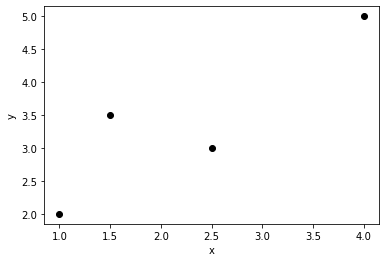

In [3]:
X = np.array([1,1.5,2.5,4.0])
y = np.array([2,3.5,3,5])
plt.scatter(X, y, c='k')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Then use gradient descent to fit the linear regression line.

In [4]:
X = pd.DataFrame(X)
y = pd.Series(y)
model = gradient_descent_LR()
model.fit(X, y, gamma=0.002, max_iter=50, eta=0.001)

First we check the loss history figure to see how the MSE loss decreases during training period.

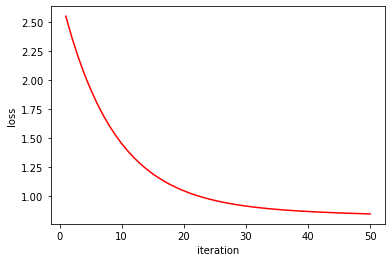

In [5]:
plt.plot(range(1, len(model.loss_history)), model.loss_history[1:len(model.loss_history)], c='r')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [6]:
len(model.loss_history)

51

The MSE loss drops fast at the first steps, and slows down after 10 steps, finally reaches the threshold $\eta$.

Take a look at the regression lines during training period, at $t=10, 20, 30, 50$.

Loss at iter 10 = 1.4514245815931104
Loss at iter 20 = 1.045337223612921
Loss at iter 30 = 0.9142949546149977
Loss at iter 50 = 0.8467095222253073


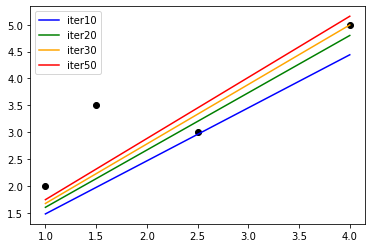

In [7]:
plt.scatter(X, y, c='k')
colors = {10:'blue', 20:'green', 30:'orange' , 50:'red'}
for i in [10, 20, 30, 50]:
    weights = model.weights_history[i]
    L = model.loss_history[i]
    print(f'Loss at iter {i} = {L}')
    plt.plot(X.to_numpy(), model.prediction(X, weights), label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()

From the figure, the regression line moves to the correct place step by step, and the loss also dereases. But it seems that the convergence is slow, let's increase the learning rate to 0.005.

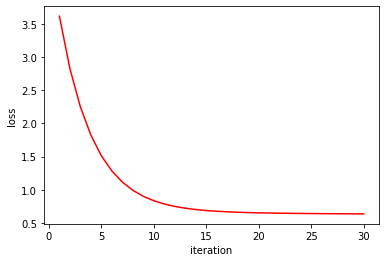

In [8]:
model = gradient_descent_LR()
model.fit(X, y, gamma=0.005, max_iter=50, eta=0.001)
plt.plot(range(1, len(model.loss_history)), model.loss_history[1:len(model.loss_history)], c='r')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

Take a look at the regression lines during training period, at $t=10, 20, 30, 50$.

Loss at iter 10 = 0.8344368419465319
Loss at iter 20 = 0.652851838829811
Loss at iter 30 = 0.6364027658442738


IndexError: list index out of range

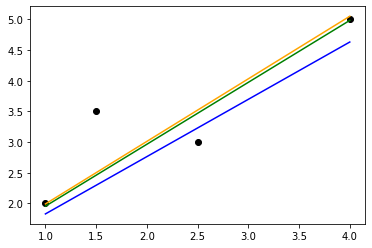

In [9]:
plt.scatter(X, y, c='k')
colors = {10:'blue', 20:'green', 30:'orange' , 50:'red'}
for i in [10, 20, 30, 50]:
    weights = model.weights_history[i]
    L = model.loss_history[i]
    print(f'Loss at iter {i} = {L}')
    plt.plot(X.to_numpy(), model.prediction(X, weights), label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()

This time the training process converges faster, since learning rate is increased.

Let's increase the threshold $\eta$ and see how threshold could affect the training process.

In [ ]:
model = gradient_descent_LR()
model.fit(X, y, gamma=0.002, max_iter=50, eta=0.01)
plt.plot(range(1, len(model.loss_history)), model.loss_history[1:len(model.loss_history)], c='r')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [ ]:
plt.scatter(X, y, c='k')
colors = {10:'blue', 20:'green', 30:'orange' , len(model.weights_history)-1:'red'}
for i in [10, 20, 30, len(model.weights_history)-1]:
    weights = model.weights_history[i]
    L = model.loss_history[i]
    print(f'Loss at iter {i} = {L}')
    plt.plot(X.to_numpy(), model.prediction(X, weights), label = f'iter{i}', color = colors[i])
plt.legend()
plt.show()

Compared with threshold $\eta=0.001$, $\eta=0.01$ makes the convergence faster, which is good for learning fasters in complex models. But also the MSE loss is larger, making the trained weights worse.

---
#### Ethereum (ETH) price data <a class="anchor" id="ETH"></a>
---

We apply our gradient descent method on fitting the linear regression model of predicting ETH price in Linear Regression section. [Ethereum](https://en.wikipedia.org/wiki/Ethereum) (by wikipedia) is a decentralized, open-source blockchain with smart contract functionality. Ether (ETH) is the native cryptocurrency of the platform. Amongst cryptocurrencies, Ether is second only to Bitcoin in market capitalization. 

Nowadays prices of Ethereum and other cryptocurrencies are increasing rapidly, so they are becoming more and more popular among traders and investors.

In this problem we focus on predicting future ETH price using history ETH prices from *pandas_datareader*. And we use *plotly* to plot nice figures.

First we take a look at the ETH price in USD from Jan to Nov, 2021.

In [ ]:
data = web.DataReader('ETH-USD',
                     'yahoo',
                     start = '2021-01-01',
                     end = '2021-11-30')
data.head(3)

Our goal is to predict close price using previous prices of 3-days. Plot the close price curve of ETH.

In [ ]:
all_df = pd.DataFrame(data['Close'])
plt.plot(all_df)
plt.show()

Create our input data set, only use the first 1 month.

In [ ]:
for i in range(1, 8):
    all_df[f'lag_{i}'] = all_df['Close'].shift(i)

all_df.dropna(inplace=True)
cols = [f'lag_{i}' for i in range(1, 8)]

train_df = all_df.iloc[0:31-7, :]
X = train_df[cols]
y = train_df['Close']

Scale X to reduce computational complexity when multiplying matrice.

In [ ]:
X_scaler = StandardScaler()
X_scaled = pd.DataFrame(X_scaler.fit_transform(X))

Try our gradient descent method.

In [ ]:
model = gradient_descent_LR()
model.fit(X_scaled, y, gamma=0.005, max_iter=100, eta=0.001)
plt.plot(range(1, len(model.loss_history)), model.loss_history[1:len(model.loss_history)], c='r')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

A good fit. Looks like gradient descent works well on the same data in the Linear Regression section. Let's plot the prediction curve.

In [ ]:
plt.plot(y.index, y, c='b', label = "true")
plt.plot(y.index, model.prediction(X_scaled, model.weights), c='r', label = "prediction")
plt.legend()
plt.show()

Not a bad prediction, and the result is similar to the result in the Linear Regression section, so gradient descent works well.